Treating Redun to be equal to the list of 5 integers in the first line only.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the content from the uploaded file
filepath = "/content/cicylist.txt"
with open(filepath, "r") as file:
    raw_data = file.read()

# Splitting data based on "Num    :" to get separate records
records = [rec for rec in raw_data.split("Num    :") if rec.strip()]

structured_data = []

for record in records:
    lines = record.strip().split('\n')
    entry = {}

    # Extracting field values
    entry['Num'] = int(lines[0].strip())
    entry['NumPs'] = int(lines[1].split(":")[1].strip())
    entry['NumPol'] = int(lines[2].split(":")[1].strip())
    entry['Eta'] = int(lines[3].split(":")[1].strip())
    entry['H11'] = int(lines[4].split(":")[1].strip())
    entry['H21'] = int(lines[5].split(":")[1].strip())
    entry['C2'] = [int(i) for i in lines[6].split(":")[1].strip('{} \n').split(',')]
    entry['Redun'] = [int(i) for i in lines[7].split(":")[1].strip('{} \n').split(',')]

    # Extracting matrix values
    matrix = []
    for line in lines[8:]:
        matrix.append([int(i) for i in line.strip('{} \n').split(',')])

    entry['Matrix'] = matrix

    structured_data.append(entry)

# Convert list of dictionaries to pandas DataFrame
df = pd.DataFrame(structured_data)
df


,Num,NumPs,NumPol,Eta,H11,H21,C2,Redun,Matrix
0,1,7,6,0,15,15,"[24, 24, 24, 24, 24, 36, 36]","[0, 0, 0, 0, 0]","[[1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0..."
1,2,7,6,0,15,15,"[24, 24, 24, 24, 24, 36, 36]","[0, 0, 0, 0, 0]","[[1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1], [0, 0..."
2,3,6,6,0,15,15,"[24, 24, 24, 36, 36, 36]","[0, 0, 0, 0, 0]","[[1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0..."
3,4,8,5,0,15,15,"[24, 24, 24, 24, 24, 24, 24, 24]","[0, 0, 0, 0, 0]","[[1, 1, 0, 0, 0], [0, 0, 1, 0, 1], [1, 0, 0, 1..."
4,5,9,6,0,15,15,"[24, 24, 24, 24, 24, 24, 24, 24, 24]","[0, 0, 0, 0, 0]","[[1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0..."
...,...,...,...,...,...,...,...,...,...
7885,7886,2,3,-168,2,86,"[24, 56]","[7888, 0, 0, 0, 0]","[[0, 1, 1], [4, 1, 1]]"
7886,7887,2,1,-168,2,86,"[24, 44]","[0, 0, 0, 0, 0]","[[2], [4]]"
7887,7888,2,2,-168,2,86,"[24, 56]","[7886, 0, 0, 0, 0]","[[0, 2], [4, 1]]"
7888,7889,1,2,-176,1,89,[56],"[0, 0, 0, 0, 0]","[[4, 2]]"


In [ ]:
# Creating a new column 'Sum_H11_H21' that contains the sum of 'H11' and 'H21'
df['Sum_H11_H21'] = df['H11'] + df['H21']

# Creating a new column 'Sum_H11_H21' that contains the sum of 'H11' and 'H21'
df['Diff_H11_H21'] = df['H11'] - df['H21']

df.head()

,Num,NumPs,NumPol,Eta,H11,H21,C2,Redun,Matrix,Sum_H11_H21,Diff_H11_H21
0,1,7,6,0,15,15,"[24, 24, 24, 24, 24, 36, 36]","[0, 0, 0, 0, 0]","[[1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0...",30,0
1,2,7,6,0,15,15,"[24, 24, 24, 24, 24, 36, 36]","[0, 0, 0, 0, 0]","[[1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1], [0, 0...",30,0
2,3,6,6,0,15,15,"[24, 24, 24, 36, 36, 36]","[0, 0, 0, 0, 0]","[[1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0...",30,0
3,4,8,5,0,15,15,"[24, 24, 24, 24, 24, 24, 24, 24]","[0, 0, 0, 0, 0]","[[1, 1, 0, 0, 0], [0, 0, 1, 0, 1], [1, 0, 0, 1...",30,0
4,5,9,6,0,15,15,"[24, 24, 24, 24, 24, 24, 24, 24, 24]","[0, 0, 0, 0, 0]","[[1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0...",30,0


In [ ]:
# Compute the correlation matrix for the selected columns
correlation_matrix = df[['Num', 'NumPs', 'NumPol', 'Eta', 'H11', 'H21', 'Sum_H11_H21', 'Diff_H11_H21']].corr()

correlation_matrix

,Num,NumPs,NumPol,Eta,H11,H21,Sum_H11_H21,Diff_H11_H21
Num,1.000000,-0.745633,-0.584749,-0.924207,-0.840609,0.888689,0.800174,-0.924207
NumPs,-0.745633,1.000000,0.833062,0.740503,0.715155,-0.701119,-0.614952,0.740503
NumPol,-0.584749,0.833062,1.000000,0.590516,0.486506,-0.581100,-0.543071,0.590516
Eta,-0.924207,0.740503,0.590516,1.000000,0.808764,-0.988018,-0.929148,1.000000
H11,-0.840609,0.715155,0.486506,0.808764,1.000000,-0.708300,-0.534024,0.808764
H21,0.888689,-0.701119,-0.581100,-0.988018,-0.708300,1.000000,0.975076,-0.988018
Sum_H11_H21,0.800174,-0.614952,-0.543071,-0.929148,-0.534024,0.975076,1.000000,-0.929148
Diff_H11_H21,-0.924207,0.740503,0.590516,1.000000,0.808764,-0.988018,-0.929148,1.000000


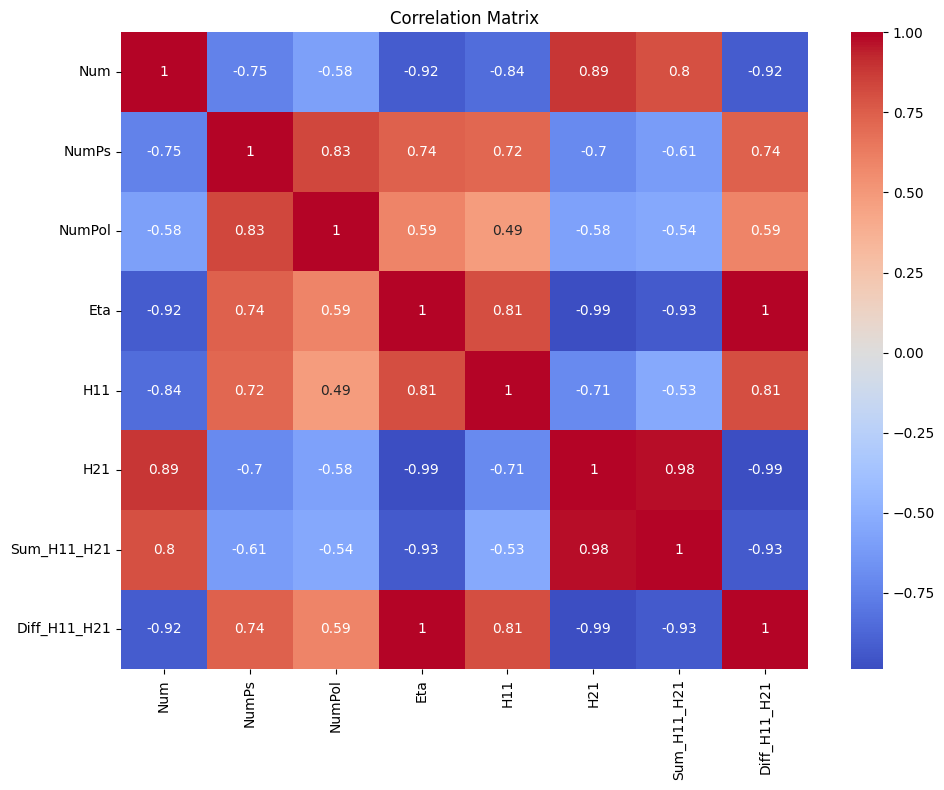

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

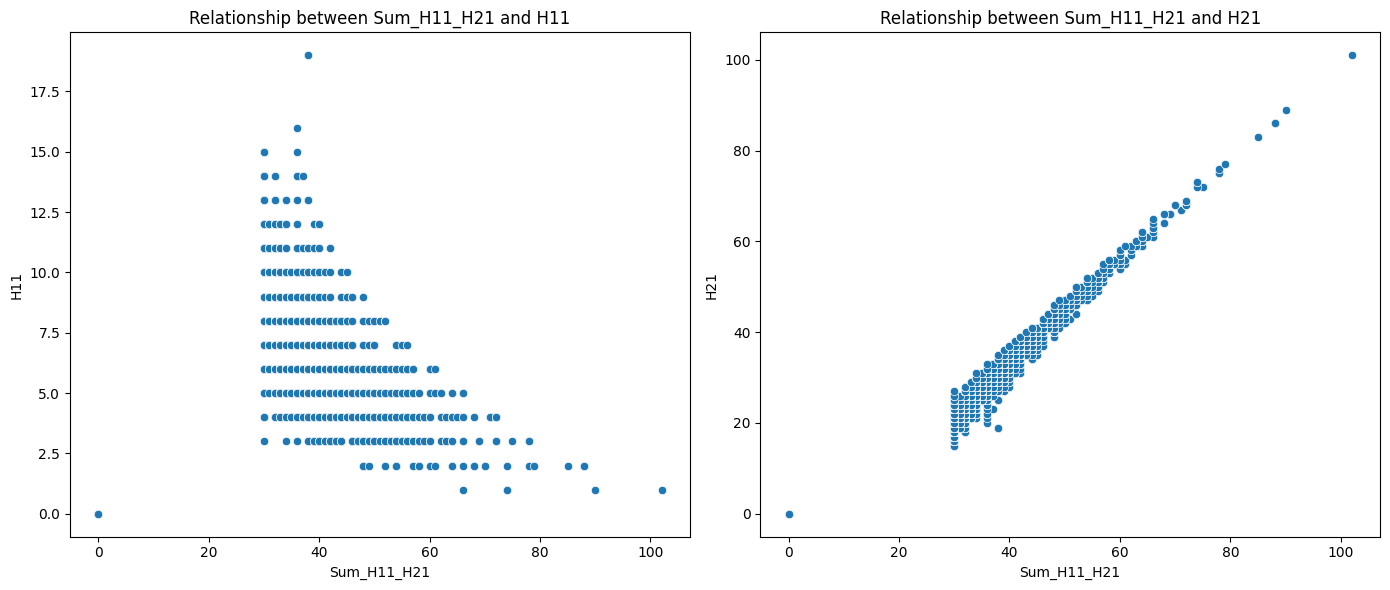

In [ ]:
# Visualizing the relationship between Sum_H11_H21 and the individual values H11 and H21

plt.figure(figsize=(14, 6))

# Scatter plot for H11
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Sum_H11_H21', y='H11')
plt.title('Relationship between Sum_H11_H21 and H11')

# Scatter plot for H21
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Sum_H11_H21', y='H21')
plt.title('Relationship between Sum_H11_H21 and H21')

plt.tight_layout()
plt.show()


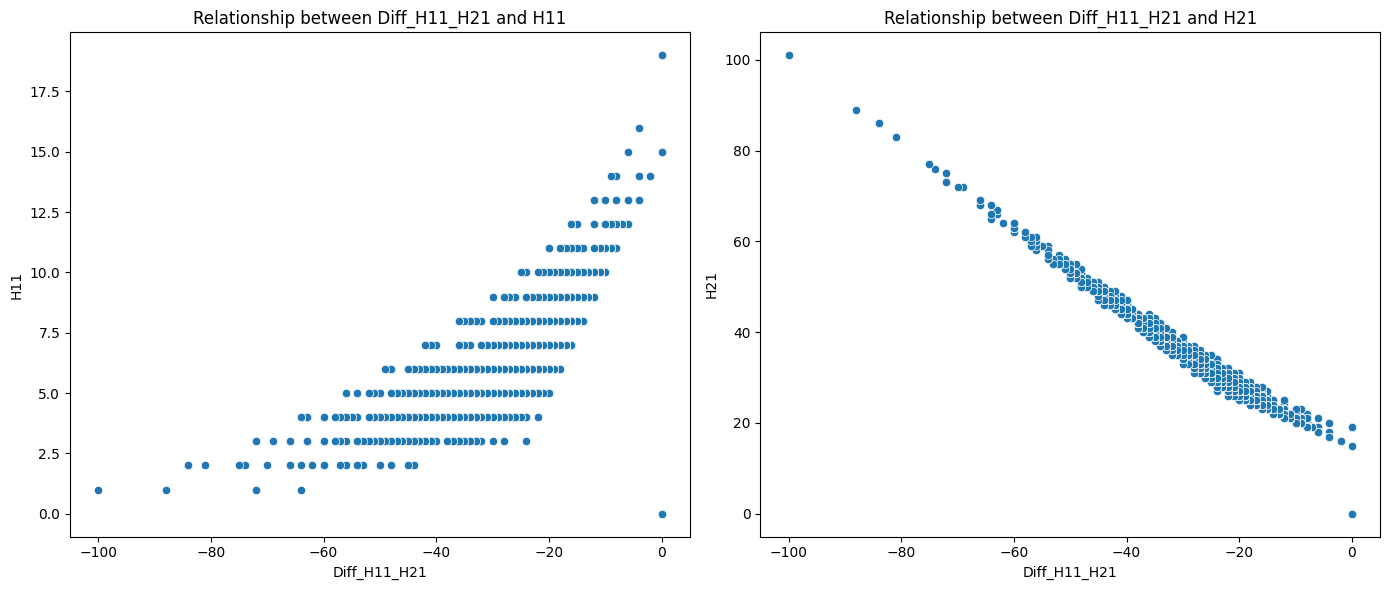

In [ ]:
# Visualizing the relationship between Diff_H11_H21 and the individual values H11 and H21

plt.figure(figsize=(14, 6))

# Scatter plot for H11
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Diff_H11_H21', y='H11')
plt.title('Relationship between Diff_H11_H21 and H11')

# Scatter plot for H21
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Diff_H11_H21', y='H21')
plt.title('Relationship between Diff_H11_H21 and H21')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting data into training and testing sets
X = df[['Sum_H11_H21']]
y = df[['H11', 'H21']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model's performance
mse_h11 = mean_squared_error(y_test['H11'], y_pred[:, 0])
mse_h21 = mean_squared_error(y_test['H21'], y_pred[:, 1])

mse_h11, mse_h21


(3.050974692773148, 3.1610020840570443)

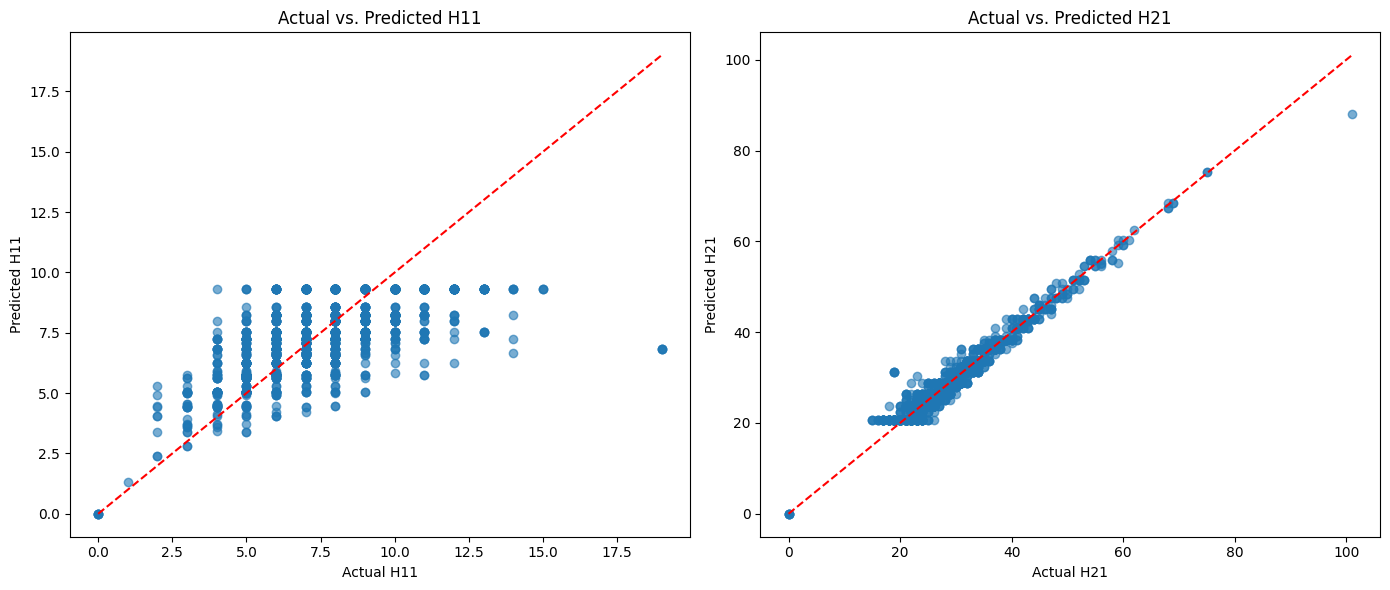

In [ ]:
# Plotting the predicted values against the actual values

plt.figure(figsize=(14, 6))

# Plot for H11
plt.subplot(1, 2, 1)
plt.scatter(y_test['H11'], y_pred[:, 0], alpha=0.6)
plt.plot([min(y_test['H11']), max(y_test['H11'])], [min(y_test['H11']), max(y_test['H11'])], 'r--')
plt.xlabel('Actual H11')
plt.ylabel('Predicted H11')
plt.title('Actual vs. Predicted H11')

# Plot for H21
plt.subplot(1, 2, 2)
plt.scatter(y_test['H21'], y_pred[:, 1], alpha=0.6)
plt.plot([min(y_test['H21']), max(y_test['H21'])], [min(y_test['H21']), max(y_test['H21'])], 'r--')
plt.xlabel('Actual H21')
plt.ylabel('Predicted H21')
plt.title('Actual vs. Predicted H21')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting data into training and testing sets
X = df[['Diff_H11_H21']]
y = df[['H11', 'H21']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model's performance
mse_h11 = mean_squared_error(y_test['H11'], y_pred[:, 0])
mse_h21 = mean_squared_error(y_test['H21'], y_pred[:, 1])

mse_h11, mse_h21


(1.4400335854999708, 1.5476275877879906)

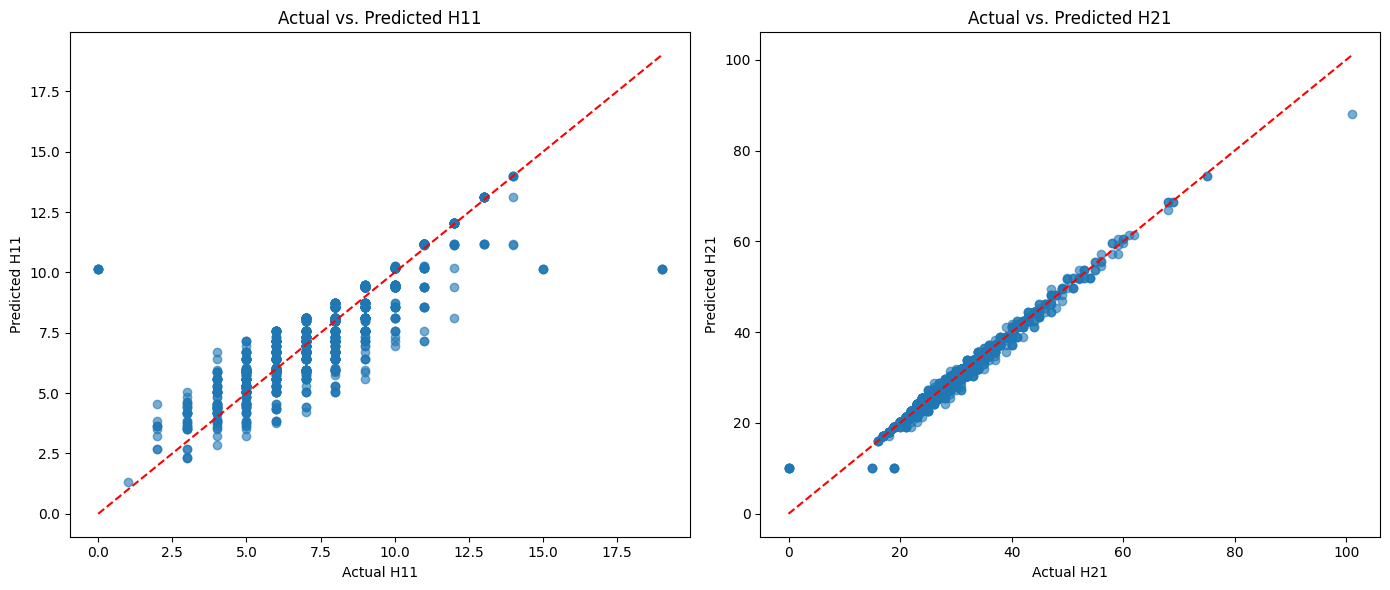

In [ ]:
# Plotting the predicted values against the actual values

plt.figure(figsize=(14, 6))

# Plot for H11
plt.subplot(1, 2, 1)
plt.scatter(y_test['H11'], y_pred[:, 0], alpha=0.6)
plt.plot([min(y_test['H11']), max(y_test['H11'])], [min(y_test['H11']), max(y_test['H11'])], 'r--')
plt.xlabel('Actual H11')
plt.ylabel('Predicted H11')
plt.title('Actual vs. Predicted H11')

# Plot for H21
plt.subplot(1, 2, 2)
plt.scatter(y_test['H21'], y_pred[:, 1], alpha=0.6)
plt.plot([min(y_test['H21']), max(y_test['H21'])], [min(y_test['H21']), max(y_test['H21'])], 'r--')
plt.xlabel('Actual H21')
plt.ylabel('Predicted H21')
plt.title('Actual vs. Predicted H21')

plt.tight_layout()
plt.show()


# Data Preprocessing

## Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variables
# Dropping 'Num' for being an index and 'Matrix_num_rows' for being equal to 'NumPs'
X = df[['Eta', 'Sum_H11_H21']]
y = df[['H11', 'H21']]

# Splitting the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the standard scaler
scaler = StandardScaler() # Z score Normalisation Z = (x - u) / s

# Fit the scaler on the training data
scaler.fit(X_train)

# Min-Max Standardization: Z = (x-xmin)/(xmax-xmin)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]  # Displaying the first 5 rows of the scaled training data for inspection


array([[-2.80019283,  3.08019629],
       [-0.06213975, -0.58683919],
       [ 1.50246201, -0.58683919],
       [ 0.03564786, -0.44579936],
       [ 0.32901069, -0.30475954]])

# ML

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = lr.predict(X_test_scaled)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)

mse

1.9073024476041563e-28

In [ ]:
lr.coef_

array([[ 5.11312221,  3.54509796],
       [-5.11312221,  3.54509796]])

In [ ]:
lr.intercept_

array([ 7.39813054, 28.76267427])


$H_{11} = 7.3981 + 5.11312221 \times \text{Eta} + 3.54509796 \times \text{Sum_H11_H21}$

$H_{21} = 28.7627 - 5.11312221 \times \text{Eta} + 3.54509796 \times \text{Sum_H11_H21}$

### Scatter Plot

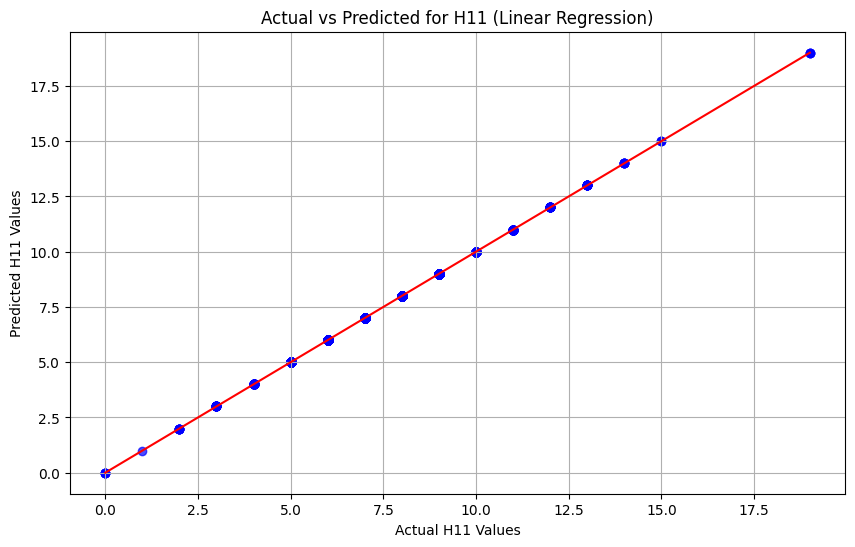

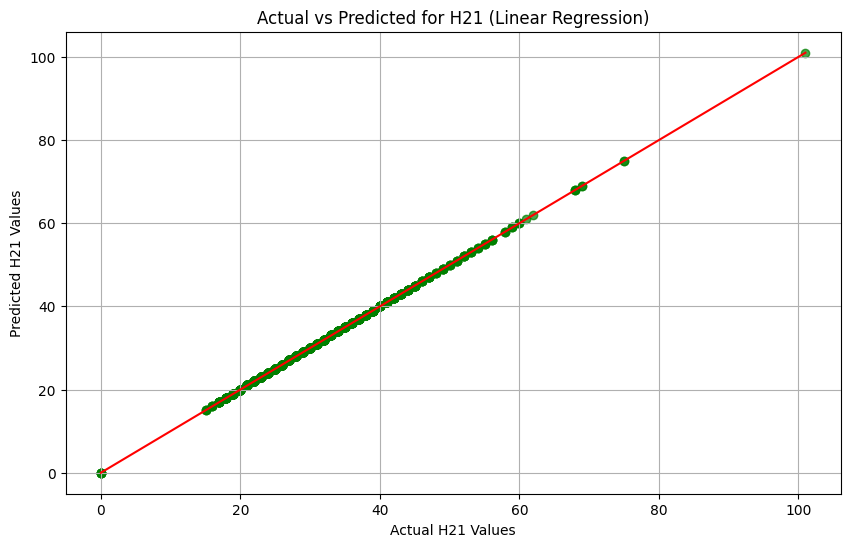

In [ ]:
# Scatter plots for Actual vs. Predicted values using the Linear Regression model

# For H11
plt.figure(figsize=(10, 6))
plt.scatter(y_test['H11'], y_pred[:, 0], alpha=0.7, color='blue')
plt.plot([min(y_test['H11']), max(y_test['H11'])],
         [min(y_test['H11']), max(y_test['H11'])], color='red')  # Diagonal line
plt.title('Actual vs Predicted for H11 (Linear Regression)')
plt.xlabel('Actual H11 Values')
plt.ylabel('Predicted H11 Values')
plt.grid(True)
plt.show()

# For H21
plt.figure(figsize=(10, 6))
plt.scatter(y_test['H21'], y_pred[:, 1], alpha=0.7, color='green')
plt.plot([min(y_test['H21']), max(y_test['H21'])],
         [min(y_test['H21']), max(y_test['H21'])], color='red')  # Diagonal line
plt.title('Actual vs Predicted for H21 (Linear Regression)')
plt.xlabel('Actual H21 Values')
plt.ylabel('Predicted H21 Values')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variables
# Dropping 'Num' for being an index and 'Matrix_num_rows' for being equal to 'NumPs'
X = df[['Eta', 'Diff_H11_H21']]
y = df[['H11', 'H21']]

# Splitting the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the standard scaler
scaler = StandardScaler() # Z score Normalisation Z = (x - u) / s

# Fit the scaler on the training data
scaler.fit(X_train)

# Min-Max Standardization: Z = (x-xmin)/(xmax-xmin)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]  # Displaying the first 5 rows of the scaled training data for inspection


array([[-2.80019283, -2.80019283],
       [-0.06213975, -0.06213975],
       [ 1.50246201,  1.50246201],
       [ 0.03564786,  0.03564786],
       [ 0.32901069,  0.32901069]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = lr.predict(X_test_scaled)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)

mse

1.9844723793203003

### Interpretation of results

[ ] To Do

### Linear Regression: Inference

In [ ]:
# Picking one instance from the test set
sample_instance = X_test_scaled[0].reshape(1, -1)
actual_values = y_test.iloc[0]

# Predicting using the trained model
predicted_values = lr.predict(sample_instance)


print("H11 actual: ", actual_values['H11'], "\nH11 predicted: ", predicted_values[0][0])
print("H21 actual: ", actual_values['H21'], "\nH21 predicted: ", predicted_values[0][1])

H11 actual:  8 
H11 predicted:  9.339415084959686
H21 actual:  22 
H21 predicted:  23.340687116449104


## XGBoost

### Training two seperate models

In [ ]:
import xgboost as xgb

# Initialize the XGBoost regressors for H11 and H21
xgb_regressor_H11 = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_regressor_H21 = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Fit the models on the training data
xgb_regressor_H11.fit(X_train_scaled, y_train['H11'])
xgb_regressor_H21.fit(X_train_scaled, y_train['H21'])

# Predict on the testing data
y_pred_H11 = xgb_regressor_H11.predict(X_test_scaled)
y_pred_H21 = xgb_regressor_H21.predict(X_test_scaled)

# Calculate the performance metrics for both models
mse_H11 = mean_squared_error(y_test['H11'], y_pred_H11)
mse_H21 = mean_squared_error(y_test['H21'], y_pred_H21)

average_mse = (mse_H11 + mse_H21) / 2

mse_H11, mse_H21, average_mse

(1.1483701675375924, 1.294627353014474, 1.2214987602760332)

### XGBoost (2 Models): Inference

In [ ]:
# Extracting the first instance from the test set
first_instance = X_test_scaled[0].reshape(1, -1)

# Extracting the actual values for the first instance from the test set
actual_H11 = y_test.iloc[0]['H11']
actual_H21 = y_test.iloc[0]['H21']

# Predicting using the two XGBoost models
prediction_H11 = xgb_regressor_H11.predict(first_instance)
prediction_H21 = xgb_regressor_H21.predict(first_instance)

actual_H11, prediction_H11[0], actual_H21, prediction_H21[0]

(8, 8.359055, 22, 22.444477)

### Training one model for multi-output

In [ ]:
# Initialize the multi-output XGBoost regressor
xgb_multi_regressor = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_multi_regressor.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred_multi = xgb_multi_regressor.predict(X_test_scaled)

# Calculate the performance metrics for the multi-output model
mse_multi_H11 = mean_squared_error(y_test['H11'], y_pred_multi[:, 0])
mse_multi_H21 = mean_squared_error(y_test['H21'], y_pred_multi[:, 1])

average_mse_multi = (mse_multi_H11 + mse_multi_H21) / 2

mse_multi_H11, mse_multi_H21, average_mse_multi

(1.1483701675375924, 1.294627353014474, 1.2214987602760332)

### XGBoost (1 Model multi-output): Inference

In [ ]:
# Extracting the first instance from the test set
first_instance = X_test_scaled[0].reshape(1, -1)

# Predicting for the first instance from the test set
first_instance_prediction = xgb_multi_regressor.predict(first_instance)

# Extracting the actual values for the first instance from the test set
actual_H11_multi = y_test.iloc[0]['H11']
actual_H21_multi = y_test.iloc[0]['H21']

# Extracting the predicted values
predicted_H11_multi = first_instance_prediction[0][0]
predicted_H21_multi = first_instance_prediction[0][1]

actual_H11_multi, predicted_H11_multi, actual_H21_multi, predicted_H21_multi

(8, 8.359055, 22, 22.444477)

### Evaluation of XGBoost

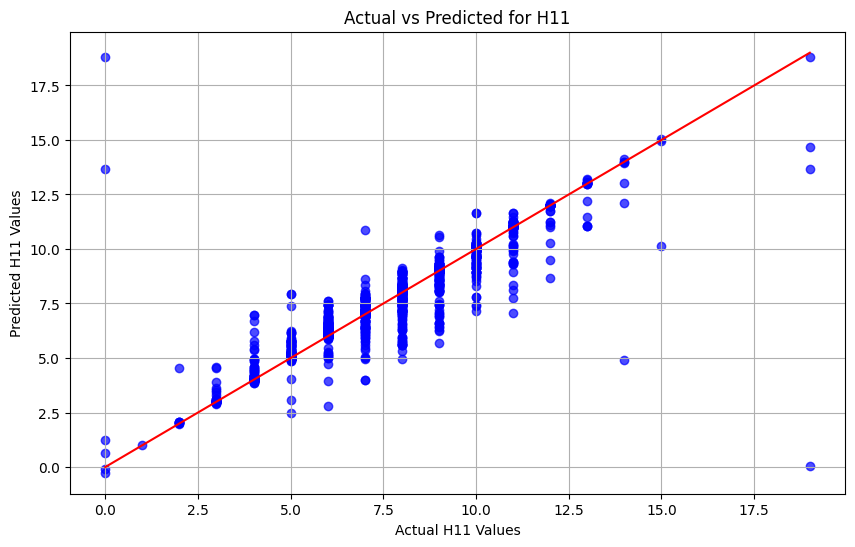

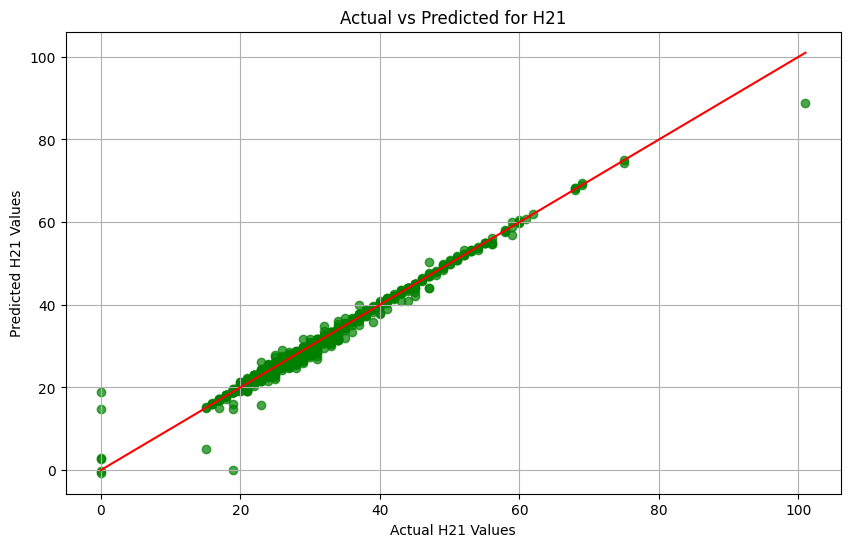

In [ ]:
# Predict on the entire test set
y_pred_multi = xgb_multi_regressor.predict(X_test_scaled)

# Actual vs Predicted for H11
plt.figure(figsize=(10, 6))
plt.scatter(y_test['H11'], y_pred_multi[:, 0], alpha=0.7, color='blue')
plt.plot([min(y_test['H11']), max(y_test['H11'])], [min(y_test['H11']), max(y_test['H11'])], color='red')  # Diagonal line
plt.title('Actual vs Predicted for H11')
plt.xlabel('Actual H11 Values')
plt.ylabel('Predicted H11 Values')
plt.grid(True)
plt.show()

# Actual vs Predicted for H21
plt.figure(figsize=(10, 6))
plt.scatter(y_test['H21'], y_pred_multi[:, 1], alpha=0.7, color='green')
plt.plot([min(y_test['H21']), max(y_test['H21'])], [min(y_test['H21']), max(y_test['H21'])], color='red')  # Diagonal line
plt.title('Actual vs Predicted for H21')
plt.xlabel('Actual H21 Values')
plt.ylabel('Predicted H21 Values')
plt.grid(True)
plt.show()


## Neural Network

### Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data into PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values)

# Splitting the training data further to create a validation set
X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor = train_test_split(X_train_tensor, y_train_tensor, test_size=0.1, random_state=42)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize the model, loss, and optimizer
model = SimpleNN(X_train_scaled.shape[1], y_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_without_improvement = 0

for epoch in range(2000):  # Maximum of 2000 epochs
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
    if epochs_without_improvement == patience:
        print(f"Early stopping after epoch {epoch}")
        break


Early stopping after epoch 1057


### Evaluation

In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)

# Convert the PyTorch tensors to numpy arrays for visualization
predicted_values = test_outputs.numpy()
actual_values = y_test_tensor.numpy()

# Calculate the MSE for H11 and H21
mse_H11 = ((predicted_values[:, 0] - actual_values[:, 0]) ** 2).mean()
mse_H21 = ((predicted_values[:, 1] - actual_values[:, 1]) ** 2).mean()

mse_H11, mse_H21

(1.074684, 1.3579775)

### Inference

In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)

# Convert the PyTorch tensors to numpy arrays for visualization
predicted_values = test_outputs.numpy()
actual_values = y_test_tensor.numpy()

# Extract the first instance from the test set
first_instance_pred = predicted_values[0]
actual_H11_nn = actual_values[0][0]
actual_H21_nn = actual_values[0][1]

# Extracting the predicted values
predicted_H11_nn = first_instance_pred[0]
predicted_H21_nn = first_instance_pred[1]

actual_H11_nn, predicted_H11_nn, actual_H21_nn, predicted_H21_nn

(8.0, 8.699499, 22.0, 22.84411)

## NN 2nd Configuration: Increased size of layers

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data into PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values)

# Splitting the training data further to create a validation set
X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor = train_test_split(X_train_tensor, y_train_tensor, test_size=0.1, random_state=42)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)  # First hidden layer with 512 neurons
        self.fc2 = nn.Linear(512, 256)       # Second hidden layer with 256 neurons
        self.fc3 = nn.Linear(256, 128)       # Third hidden layer with 128 neurons
        self.fc4 = nn.Linear(128, output_dim) # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# Initialize the model, loss, and optimizer
model = SimpleNN(X_train_scaled.shape[1], y_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
patience = 10
best_val_loss = float('inf')
epochs_without_improvement = 0

for epoch in range(2000):  # Maximum of 2000 epochs
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
    if epochs_without_improvement == patience:
        print(f"Early stopping after epoch {epoch}")
        break


Early stopping after epoch 305


### Evaluation

In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)

# Convert the PyTorch tensors to numpy arrays for visualization
predicted_values = test_outputs.numpy()
actual_values = y_test_tensor.numpy()

# Calculate the MSE for H11 and H21
mse_H11 = ((predicted_values[:, 0] - actual_values[:, 0]) ** 2).mean()
mse_H21 = ((predicted_values[:, 1] - actual_values[:, 1]) ** 2).mean()

mse_H11, mse_H21

(1.1740237, 1.313634)

### Inference

In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)

# Convert the PyTorch tensors to numpy arrays for visualization
predicted_values = test_outputs.numpy()
actual_values = y_test_tensor.numpy()

# Extract the first instance from the test set
first_instance_pred = predicted_values[0]
actual_H11_nn = actual_values[0][0]
actual_H21_nn = actual_values[0][1]

# Extracting the predicted values
predicted_H11_nn = first_instance_pred[0]
predicted_H21_nn = first_instance_pred[1]

actual_H11_nn, predicted_H11_nn, actual_H21_nn, predicted_H21_nn

(8.0, 8.937522, 22.0, 22.722807)

### Scatter Plots

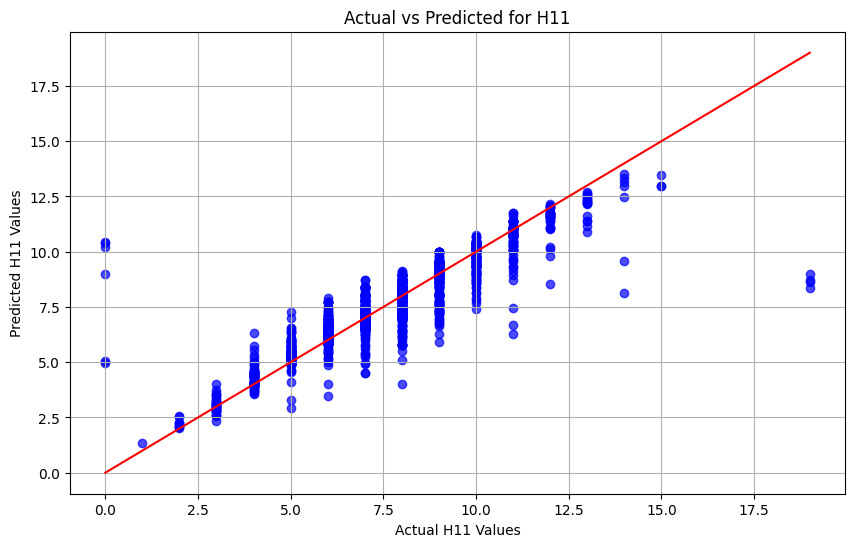

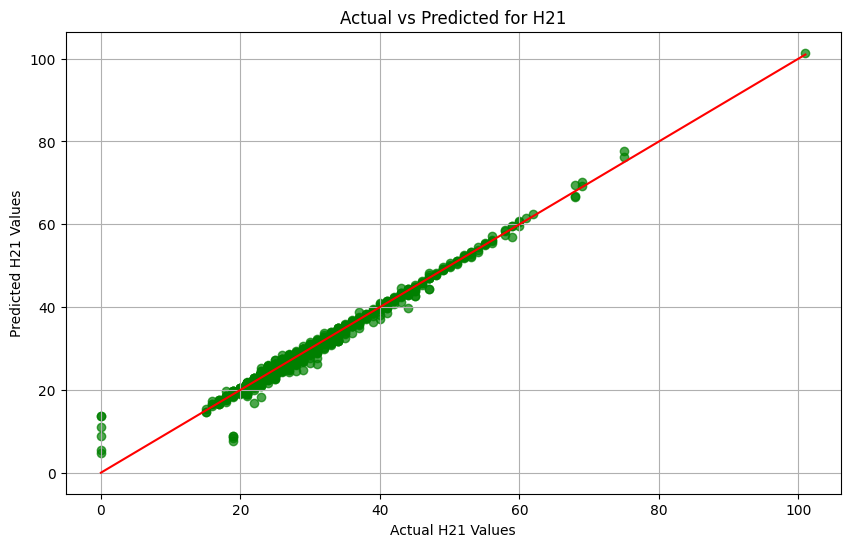

In [ ]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)

# Convert the PyTorch tensors to numpy arrays for visualization
predicted_values = test_outputs.numpy()
actual_values = y_test_tensor.numpy()

# Scatter plots for Actual vs. Predicted values
# For H11
plt.figure(figsize=(10, 6))
plt.scatter(actual_values[:, 0], predicted_values[:, 0], alpha=0.7, color='blue')
plt.plot([min(actual_values[:, 0]), max(actual_values[:, 0])],
         [min(actual_values[:, 0]), max(actual_values[:, 0])], color='red')  # Diagonal line
plt.title('Actual vs Predicted for H11')
plt.xlabel('Actual H11 Values')
plt.ylabel('Predicted H11 Values')
plt.grid(True)
plt.show()

# For H21
plt.figure(figsize=(10, 6))
plt.scatter(actual_values[:, 1], predicted_values[:, 1], alpha=0.7, color='green')
plt.plot([min(actual_values[:, 1]), max(actual_values[:, 1])],
         [min(actual_values[:, 1]), max(actual_values[:, 1])], color='red')  # Diagonal line
plt.title('Actual vs Predicted for H21')
plt.xlabel('Actual H21 Values')
plt.ylabel('Predicted H21 Values')
plt.grid(True)
plt.show()